In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [47]:
gender_submission_df=pd.read_csv('gender_submission.csv')
test_df=pd.read_csv('test.csv')
train_df=pd.read_csv('train.csv')

In [48]:
print("Gender Submission Data:")
gender_submission_df.head()


Gender Submission Data:


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [49]:
print("\nTest Data:")
test_df.head()



Test Data:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [50]:
print("\nTrain Data:")
train_df.head()


Train Data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
gender_submission_df.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [52]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [53]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [54]:
print(gender_submission_df.isnull().sum())


PassengerId    0
Survived       0
dtype: int64


In [55]:
print(test_df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [56]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [57]:
test_df["Age"].fillna(test_df['Age'].median(),inplace=True)
train_df["Age"].fillna(train_df['Age'].median(),inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

In [58]:
test_df['Cabin'].fillna('Unknown', inplace=True)
train_df['Cabin'].fillna('Unknown', inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [59]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [60]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [61]:
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

train_df['IsAlone'] = 0
train_df.loc[train_df['FamilySize'] == 1, 'IsAlone'] = 1

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Mr,1,1


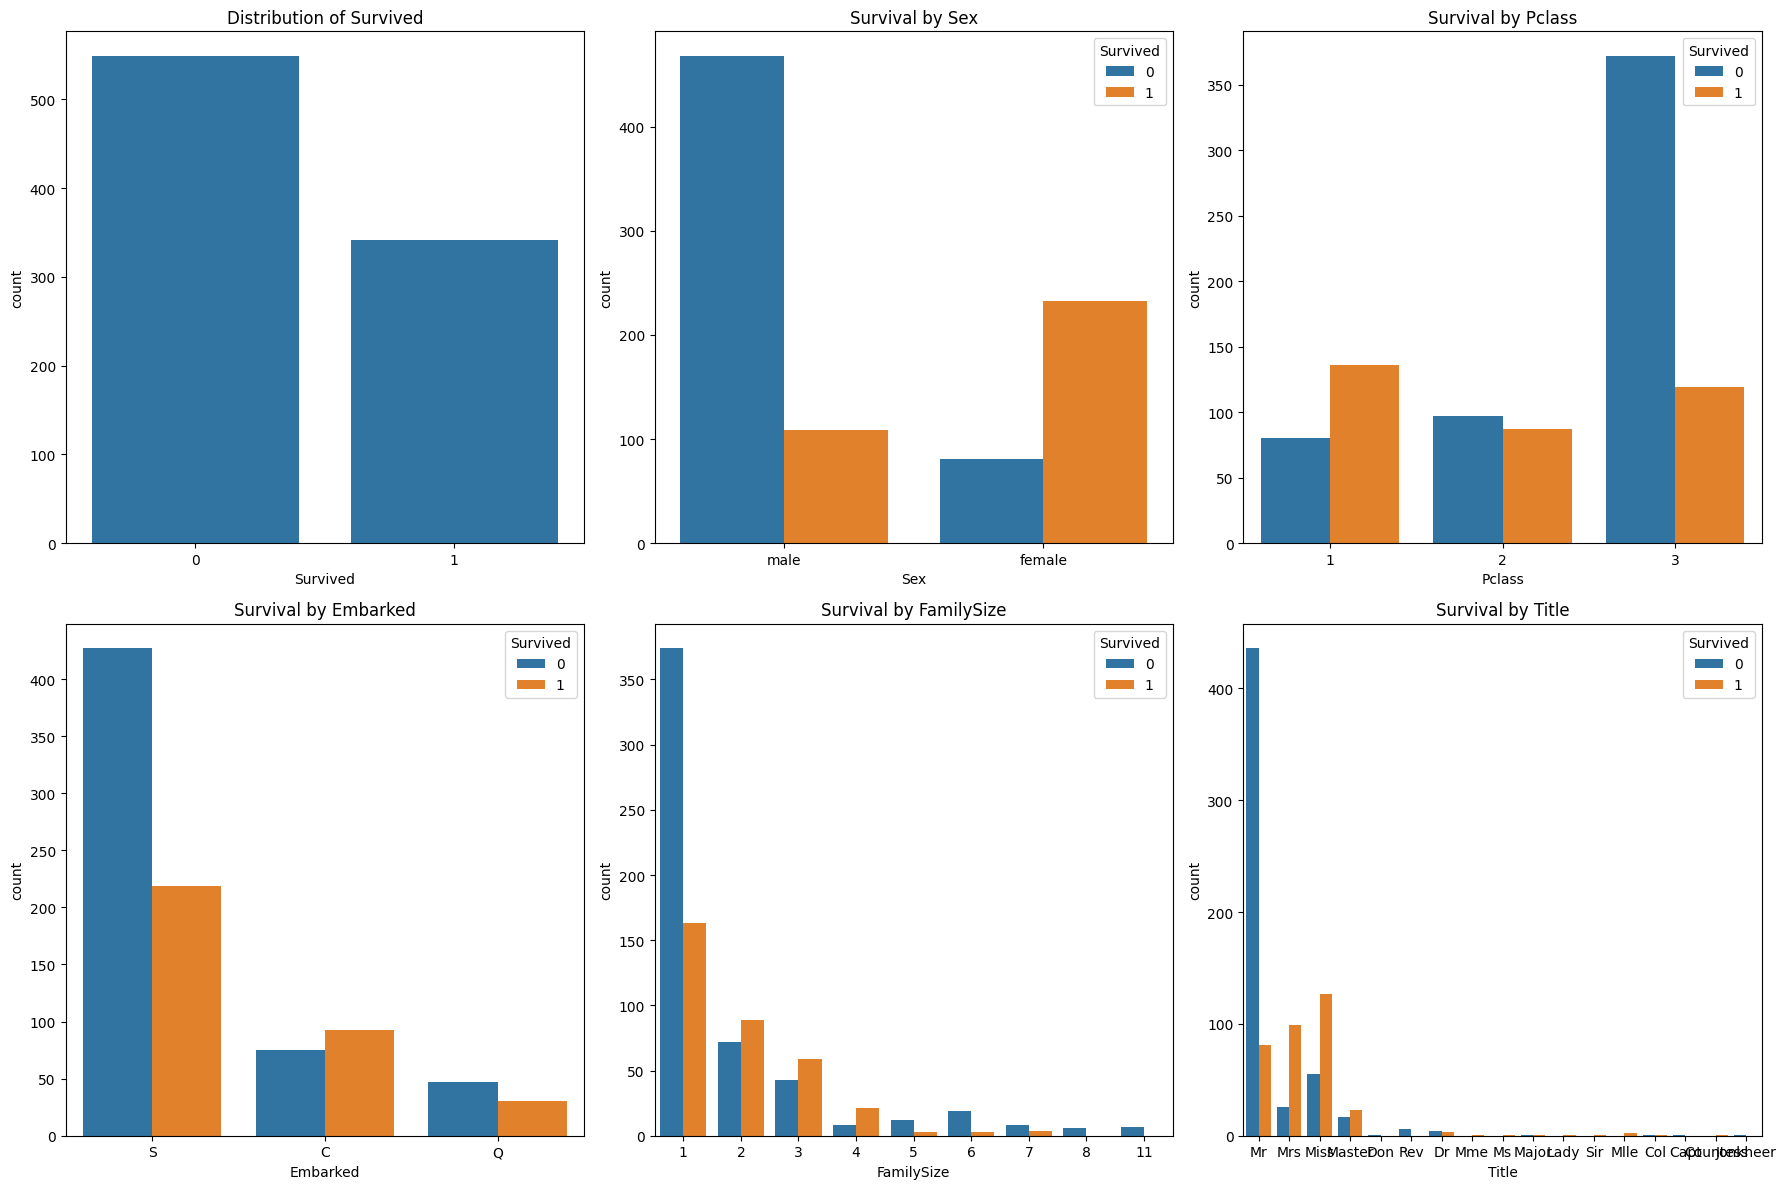

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
# Plot 1: Distribution of 'Survived'
sns.countplot(x='Survived', data=train_df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Survived')

# Plot 2: Distribution of 'Sex'
sns.countplot(x='Sex', hue='Survived', data=train_df, ax=axes[0, 1])
axes[0, 1].set_title('Survival by Sex')

# Plot 3: Distribution of 'Pclass'
sns.countplot(x='Pclass', hue='Survived', data=train_df, ax=axes[0, 2])
axes[0, 2].set_title('Survival by Pclass')

# Plot 4: Distribution of 'Embarked'
sns.countplot(x='Embarked', hue='Survived', data=train_df, ax=axes[1, 0])
axes[1, 0].set_title('Survival by Embarked')

# Plot 5: Distribution of 'FamilySize'
sns.countplot(x='FamilySize', hue='Survived', data=train_df, ax=axes[1, 1])
axes[1, 1].set_title('Survival by FamilySize')

# Plot 6: Distribution of 'Title'
sns.countplot(x='Title', hue='Survived', data=train_df, ax=axes[1, 2])
axes[1, 2].set_title('Survival by Title')

# Adjust layout
plt.tight_layout()
plt.show()

In [63]:
# Check data type and display unique values in 'Name' column
print(train_df['Name'].dtype)
train_df['Name'].unique()


object


array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

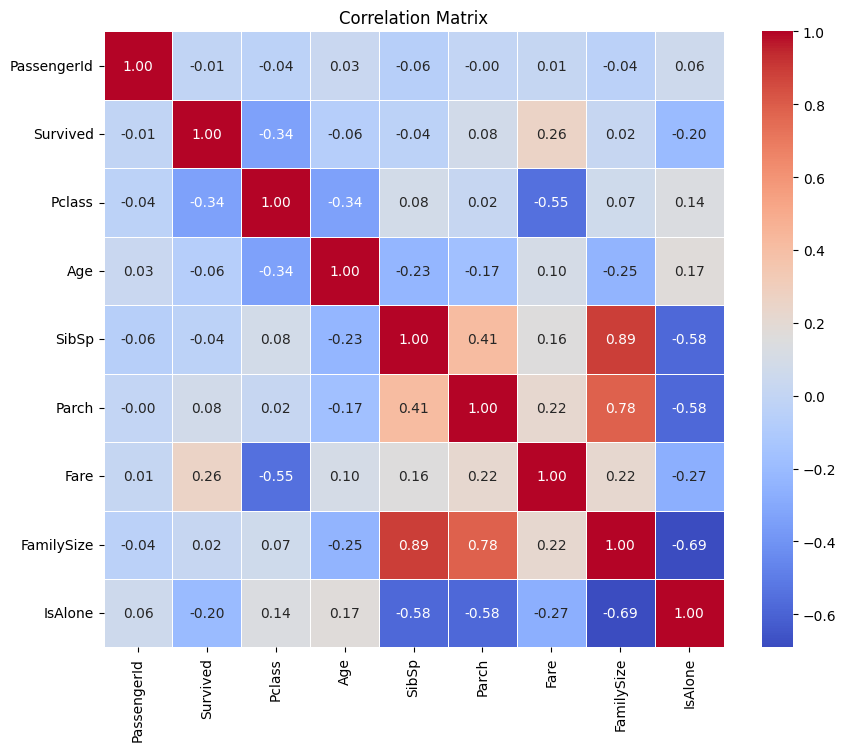

In [64]:
# Exclude non-numeric columns before computing correlation matrix
numeric_columns = train_df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = train_df[numeric_columns].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Correlation with 'Survived':
Survived       1.000000
Fare           0.257307
Parch          0.081629
FamilySize     0.016639
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
IsAlone       -0.203367
Pclass        -0.338481
Name: Survived, dtype: float64


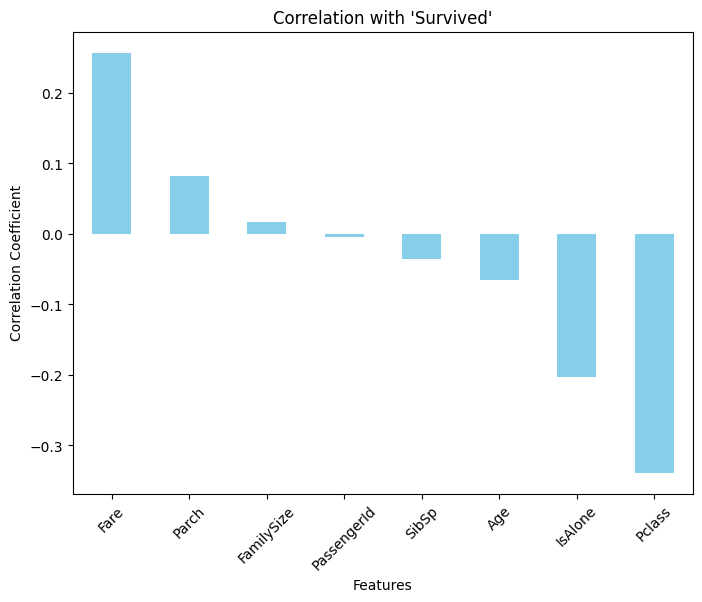

In [65]:
# Analyze correlation with 'Survived'
survived_corr = corr_matrix['Survived'].sort_values(ascending=False)

# Display correlation coefficients
print("Correlation with 'Survived':")
print(survived_corr)

# Plot bar chart of correlation coefficients
plt.figure(figsize=(8, 6))
survived_corr.drop('Survived').plot(kind='bar', color='skyblue')
plt.title("Correlation with 'Survived'")
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()


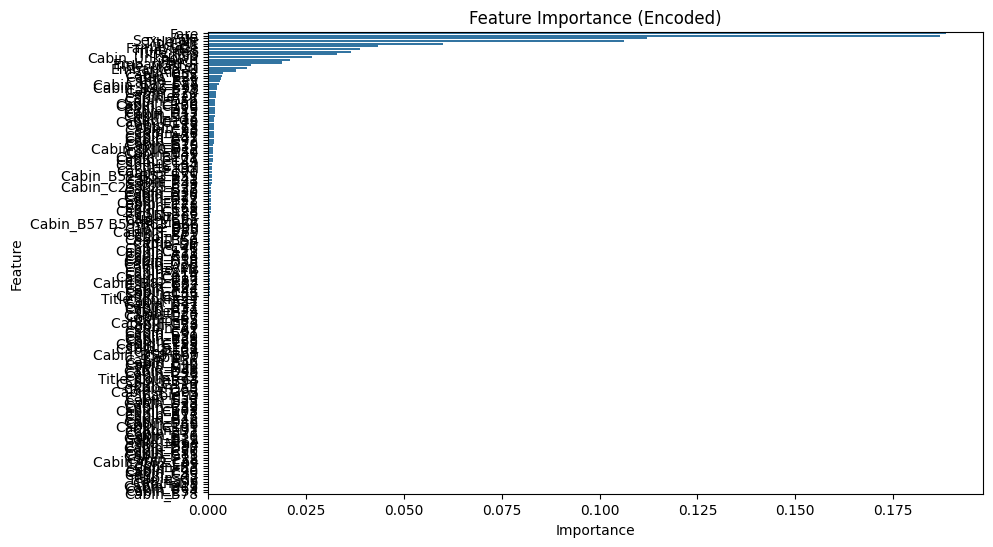

In [67]:
X_train = train_df.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket'])
y_train = train_df['Survived']

# Perform one-hot encoding for non-numeric columns
non_numeric_columns = X_train.select_dtypes(exclude=['float64', 'int64']).columns
X_train_encoded = pd.get_dummies(X_train, columns=non_numeric_columns, drop_first=True)

# Initialize and train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_encoded, y_train)

# Get feature importances
feature_importances_encoded = rf_classifier.feature_importances_

# Create DataFrame to display feature importances
feature_importance_df_encoded = pd.DataFrame({'Feature': X_train_encoded.columns, 'Importance': feature_importances_encoded})
feature_importance_df_encoded = feature_importance_df_encoded.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_encoded)
plt.title('Feature Importance (Encoded)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [74]:
from sklearn.impute import SimpleImputer

# Concatenate training and test datasets for consistent encoding
combined_df = pd.concat([train_df.drop(columns=['Survived']), test_df], axis=0)

# Extract 'Title' from 'Name' in the combined dataset
combined_df['Title'] = combined_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Preprocess combined data (including 'Title' column)
non_numeric_columns = combined_df.select_dtypes(exclude=['float64', 'int64']).columns
combined_encoded = pd.get_dummies(combined_df, columns=non_numeric_columns, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='median')  # You can choose a different strategy if needed
combined_imputed = pd.DataFrame(imputer.fit_transform(combined_encoded), columns=combined_encoded.columns)

# Split back into training and test datasets
X_train_encoded = combined_imputed[:len(train_df)]
X_test_encoded = combined_imputed[len(train_df):]

# Prepare training data
y_train = train_df['Survived']

# Initialize and train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_encoded, y_train)

# Make predictions on the test data
predictions = rf_classifier.predict(X_test_encoded)

# Optionally, if you want to save predictions to a CSV file
# Create a DataFrame with PassengerId and predictions
predictions_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': predictions})

# Save predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)


In [76]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the training dataset
scores = cross_val_score(rf_classifier, X_train_encoded, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Scores: [0.77653631 0.8258427  0.83707865 0.80898876 0.85955056]
Mean Accuracy: 0.821599397401293


In [77]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train_encoded, y_train)

# Make predictions on the test data
gb_predictions = gb_classifier.predict(X_test_encoded)

# Optionally, you can ensemble the predictions of Random Forest and Gradient Boosting
# by averaging the predicted probabilities or using a simple voting mechanism
ensemble_predictions = (predictions + gb_predictions) / 2  # Averaging predictions

# Save ensemble predictions to a CSV file
ensemble_predictions_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': ensemble_predictions})
ensemble_predictions_df.to_csv('ensemble_predictions.csv', index=False)


In [81]:
# Check the number of samples in the features and target variable
print("Number of samples in X_train_encoded:", len(X_train_encoded))
print("Number of samples in y_train:", len(y_train))


Number of samples in X_train_encoded: 891
Number of samples in y_train: 712


In [82]:
# Check for missing values in the target variable
missing_values = y_train.isnull().sum()
print("Number of missing values in y_train:", missing_values)


Number of missing values in y_train: 0


In [83]:
# Get the indices of non-null values in the target variable
y_train_indices = y_train.dropna().index

# Filter the features based on the indices of non-null values in the target variable
X_train_aligned = X_train_encoded.loc[y_train_indices]

# Now, the number of samples in X_train_aligned should match the number of non-null values in y_train
print("Number of samples in X_train_aligned:", len(X_train_aligned))


Number of samples in X_train_aligned: 712


In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the aligned dataset into training and validation sets
X_train_aligned, X_valid, y_train, y_valid = train_test_split(X_train_aligned, y_train, test_size=0.2, random_state=42)

# Train Gradient Boosting classifier on training set
gb_classifier.fit(X_train_aligned, y_train)

# Make predictions on the validation set
gb_valid_predictions = gb_classifier.predict(X_valid)

# Calculate evaluation metrics for Gradient Boosting classifier
valid_accuracy = accuracy_score(y_valid, gb_valid_predictions)
valid_precision = precision_score(y_valid, gb_valid_predictions)
valid_recall = recall_score(y_valid, gb_valid_predictions)
valid_f1 = f1_score(y_valid, gb_valid_predictions)

# Print evaluation metrics for Gradient Boosting classifier
print("Gradient Boosting Classifier Evaluation Metrics (on validation set):")
print("Accuracy:", valid_accuracy)
print("Precision:", valid_precision)
print("Recall:", valid_recall)
print("F1-score:", valid_f1)

Gradient Boosting Classifier Evaluation Metrics (on validation set):
Accuracy: 0.8111888111888111
Precision: 0.7636363636363637
Recall: 0.75
F1-score: 0.7567567567567568


In [85]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train_aligned, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions with the best model
best_gb_classifier = grid_search.best_estimator_
best_gb_predictions = best_gb_classifier.predict(X_valid)

# Calculate evaluation metrics for the best model
best_valid_accuracy = accuracy_score(y_valid, best_gb_predictions)
best_valid_precision = precision_score(y_valid, best_gb_predictions)
best_valid_recall = recall_score(y_valid, best_gb_predictions)
best_valid_f1 = f1_score(y_valid, best_gb_predictions)

# Print evaluation metrics for the best model
print("Best Gradient Boosting Classifier Evaluation Metrics (on validation set):")
print("Accuracy:", best_valid_accuracy)
print("Precision:", best_valid_precision)
print("Recall:", best_valid_recall)
print("F1-score:", best_valid_f1)


Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300}
Best Gradient Boosting Classifier Evaluation Metrics (on validation set):
Accuracy: 0.8111888111888111
Precision: 0.7543859649122807
Recall: 0.7678571428571429
F1-score: 0.7610619469026548
